In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_csv("/content/twitter_training.csv")
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [10]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text) # Convert to string to handle non-string types like floats (NaN)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

In [11]:
df['clean_text'] = df['im getting on borderlands and i will murder you all ,'].apply(clean_text)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",clean_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder


In [12]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [13]:
df['sentiment'] = df['clean_text'].apply(get_sentiment)
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",clean_text,sentiment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,Neutral
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,Neutral
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,Neutral
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,Neutral
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder,Neutral


In [14]:
df['sentiment'].value_counts()


,count
sentiment,
Positive,32899
Negative,21094
Neutral,20688


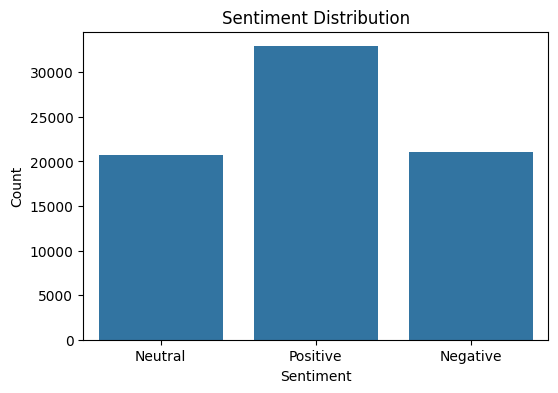

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


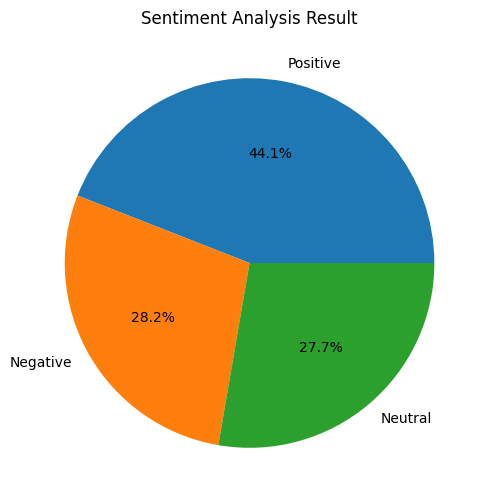

In [16]:
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title("Sentiment Analysis Result")
plt.ylabel("")
plt.show()


In [17]:
print("Conclusion:")
print("Most social media posts show a positive sentiment, indicating favorable public opinion.")


Conclusion:
Most social media posts show a positive sentiment, indicating favorable public opinion.
